In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_train.csv' , header=0)
# identify the unique values in the 'ground_truth' column
unique_ids = train['ground_truth'].value_counts()[train['ground_truth'].value_counts() == 1].index
# filter out the rows with unique 'ground_truth' values
train = train[~train['ground_truth'].isin(unique_ids)]
train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,-0.106307,-0.076018,-0.081182,0.028428,0.006551,-0.049328,-0.131857,-0.037628,0.003007,0.085964,...,-0.088359,-0.011955,0.072061,-0.239798,0.282087,-0.085467,0.008205,0.139863,-0.100712,http://www.semanticweb.org/needed-terms#001
1,-0.012138,-0.009232,0.024595,-0.021252,-0.015880,-0.047778,-0.011917,0.028311,-0.034624,0.059547,...,-0.274189,-0.501134,0.305044,0.213702,-0.469372,0.195861,-0.185408,0.056212,0.258238,http://semanticscience.org/resource/SIO_000281
2,-0.052939,-0.071929,0.021859,0.011558,-0.049912,-0.007417,0.011347,0.026139,-0.013402,-0.028613,...,-0.009154,-0.019550,-0.094600,0.098562,-0.025860,-0.037455,-0.112670,0.071711,0.070507,no_link_known
3,-0.733260,0.043293,0.119687,-0.123384,-0.071939,-0.126068,0.032904,0.110734,-0.096527,-0.095115,...,-0.101405,0.220706,0.192686,-0.176124,-0.216842,-0.436630,0.103777,-0.110369,-0.125698,no_link_known
4,-0.036974,-0.005872,-0.002371,-0.035732,-0.029971,-0.052257,0.016698,0.027884,0.000931,0.016802,...,0.005399,0.063239,-0.027632,-0.001155,0.048586,0.052991,0.027887,0.004721,-0.061660,no_link_known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364605,-0.052012,-0.050973,0.035910,-0.059969,-0.061255,-0.053517,1.033800,0.041240,-0.052969,0.050190,...,0.034043,0.038958,-0.019946,-0.008046,0.001575,-0.011575,-0.047649,-0.035770,-0.002342,no_link_known
2364606,-0.059736,-0.061631,0.070624,0.048631,0.038553,0.030114,-0.824042,0.028283,-0.084142,-0.113815,...,-0.266709,-0.537886,0.321153,0.181186,-0.507742,0.207627,-0.238616,0.106768,0.250761,http://semanticscience.org/resource/SIO_000281
2364607,0.036065,0.071069,-0.168564,0.064844,0.088171,0.013884,0.160834,-0.273891,0.120310,-0.068251,...,0.009662,0.028640,-0.053873,0.002138,0.008572,0.031187,-0.037569,-0.022562,0.013139,http://www.w3.org/1999/02/22-rdf-syntax-ns#label
2364608,0.059826,0.027907,0.042077,-0.105650,-0.061793,0.070876,0.088055,-0.013670,-0.131062,0.035856,...,-0.252920,0.035881,0.221206,-0.067258,-0.011880,-0.220015,-0.025483,0.051174,-0.045477,http://www.semanticweb.org/needed-terms#001


In [3]:
# Validation set
val = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_val.csv' , header=0)
# identify the unique values in the 'ground_truth' column
unique_ids = val['ground_truth'].value_counts()[val['ground_truth'].value_counts() == 1].index
val = val[~val['ground_truth'].isin(unique_ids)]
val

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.176603,0.144554,-0.121246,0.352947,0.161330,0.119488,0.204768,-0.100077,0.156833,-0.120513,...,0.048977,0.036158,-0.062647,0.061191,0.034371,0.017874,-0.018670,-0.061726,-0.032668,no_link_known
1,0.230500,0.027735,-0.311731,-0.056029,0.097707,0.272195,0.340572,0.002959,0.306213,-0.027642,...,0.039863,0.051089,-0.081835,0.056872,0.049417,0.033689,-0.008890,-0.049069,-0.015917,http://www.semanticweb.org/needed-terms#009
2,0.195384,0.188668,-0.220960,-0.023338,-0.027151,0.020286,0.266949,-0.348298,0.268543,-0.163545,...,0.022186,-0.007695,-0.020189,-0.036016,0.016186,0.028108,-0.007122,0.038059,-0.028528,no_link_known
3,0.026929,0.074788,0.035858,-0.005145,-0.042590,0.019052,0.033178,0.090141,-0.043595,-0.071027,...,0.167388,0.088925,-0.027883,-0.040423,0.085831,0.083911,-0.083440,-0.009200,-0.090322,http://semanticscience.org/resource/SIO_000281
4,0.008397,-0.001974,-0.007151,-0.004110,-0.033697,-0.053781,-0.049135,0.044767,-0.010571,0.032441,...,0.009489,0.020247,-0.027801,0.050793,0.010482,0.012848,-0.005974,-0.019075,-0.045278,no_link_known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234137,0.176400,0.218860,-0.280247,0.305255,0.101689,0.111522,-0.095150,-0.109428,0.155395,-0.027120,...,0.036530,0.021950,-0.020570,-0.017535,0.031310,0.024575,-0.009150,-0.023717,-0.029366,no_link_known
234138,0.064738,0.126745,-0.028705,0.136302,0.126094,0.199326,0.161574,-0.012139,0.113478,-0.176163,...,0.046814,0.006897,-0.067952,-0.032035,-0.598163,0.024000,-0.018999,-0.023364,-0.046112,http://www.semanticweb.org/needed-terms#001
234139,0.009338,0.000967,0.000705,-0.058703,-0.058091,-0.004134,0.016403,0.012446,-0.016351,-0.027040,...,-0.064294,0.002646,-0.086266,0.143449,0.015991,-0.137966,0.122271,-0.188965,0.189511,no_link_known
234140,0.044665,-0.104824,-0.071804,-0.174067,-0.122643,-0.149357,-0.144405,0.002902,-0.149952,0.087081,...,-0.013302,0.045505,0.034258,0.093059,0.120011,0.007771,-0.001258,-0.075868,-0.069958,no_link_known


In [4]:
# Experiment setup=2
s = setup(train, target = 'ground_truth', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,6464
1,Target,ground_truth
2,Target type,Multiclass
3,Target mapping,"http://semanticscience.org/resource/SIO_000281: 0, http://semanticscience.org/resource/SIO_000628: 1, http://semanticscience.org/resource/SIO_001279: 2, http://www.semanticweb.org/needed-terms#001: 3, http://www.semanticweb.org/needed-terms#002: 4, http://www.semanticweb.org/needed-terms#004: 5, http://www.semanticweb.org/needed-terms#009: 6, http://www.w3.org/1999/02/22-rdf-syntax-ns#label: 7, http://www.w3.org/1999/02/22-rdf-syntax-ns#type: 8, http://www.w3.org/2000/01/rdf-schema#subClassOf: 9, no_link_known: 10"
4,Original data shape,"(2364610, 101)"
5,Transformed data shape,"(2364610, 101)"
6,Transformed train set shape,"(1891688, 101)"
7,Transformed test set shape,"(472922, 101)"
8,Numeric features,100
9,Preprocess,True


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


# K Neighbors Classifier

In [5]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9342,0.9779,0.9342,0.9363,0.9345,0.9048,0.9056
1,0.9341,0.9781,0.9341,0.9364,0.9345,0.9047,0.9055
2,0.9339,0.9776,0.9339,0.9359,0.9341,0.9045,0.9052
3,0.9335,0.9777,0.9335,0.9355,0.9337,0.9040,0.9047
4,0.9341,0.9783,0.9341,0.9364,0.9345,0.9048,0.9055
5,0.9336,0.9780,0.9336,0.9359,0.9340,0.9041,0.9049
6,0.9340,0.9780,0.9340,0.9363,0.9343,0.9047,0.9055
7,0.9334,0.9774,0.9334,0.9355,0.9336,0.9037,0.9044
8,0.9340,0.9779,0.9340,0.9362,0.9343,0.9047,0.9054


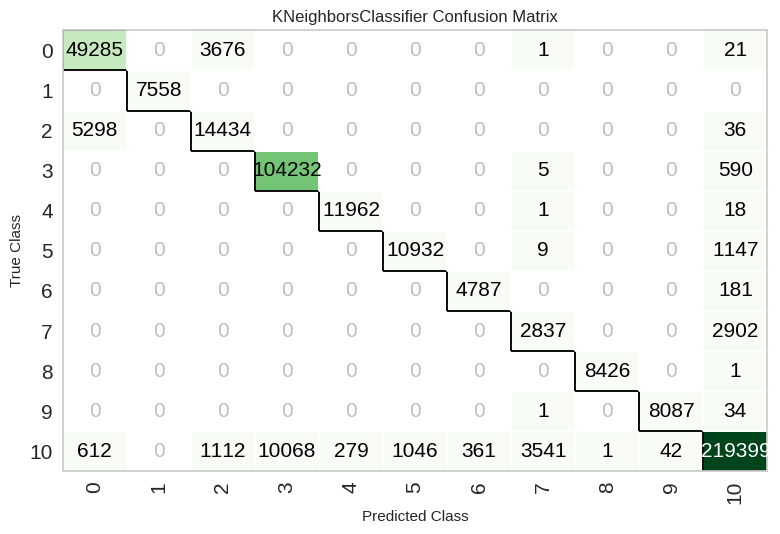

In [6]:
plot_model(knn, plot = 'confusion_matrix')

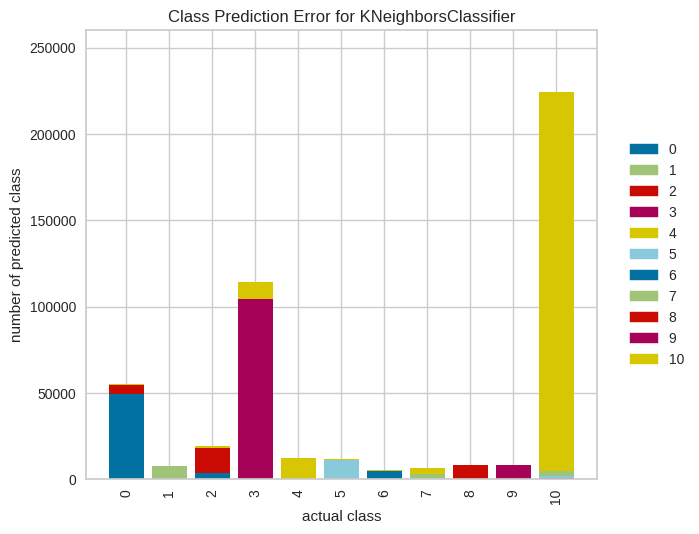

In [7]:
plot_model(knn, plot = 'error')

In [8]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [9]:
knn_val_pred = predict_model(knn, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4094,0,0,0,0,-0.0276,-0.0351


In [10]:
save_model(knn, 'knn.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                          

# Naive Bayes

In [11]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8883,0.9795,0.8883,0.9196,0.8994,0.8428,0.8466
1,0.8876,0.9794,0.8876,0.9194,0.8989,0.8419,0.8458
2,0.8883,0.9791,0.8883,0.9195,0.8994,0.8428,0.8466
3,0.8876,0.9791,0.8876,0.9187,0.8987,0.8419,0.8457
4,0.8894,0.9799,0.8894,0.9206,0.9005,0.8444,0.8482
5,0.8875,0.9795,0.8875,0.9199,0.8991,0.8418,0.8457
6,0.8881,0.9793,0.8881,0.9195,0.8993,0.8426,0.8464
7,0.8871,0.9792,0.8871,0.9187,0.8985,0.8412,0.8450
8,0.8886,0.9795,0.8886,0.9195,0.8996,0.8432,0.8469


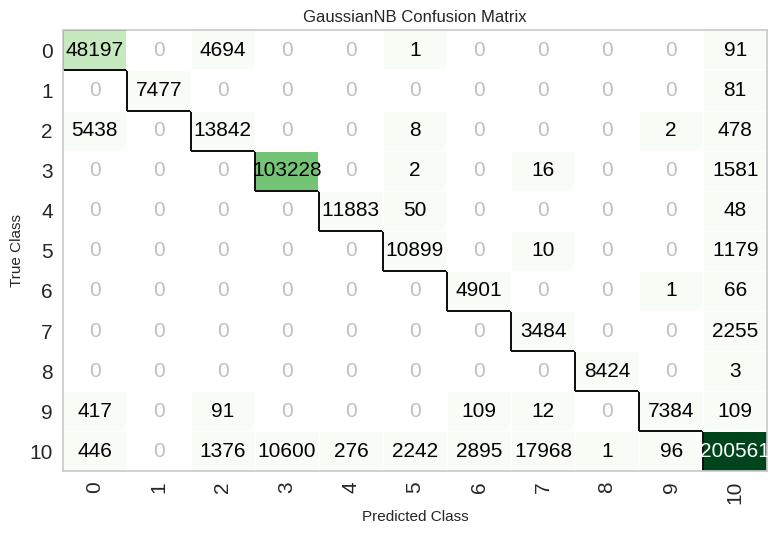

In [12]:
plot_model(nb, plot = 'confusion_matrix')

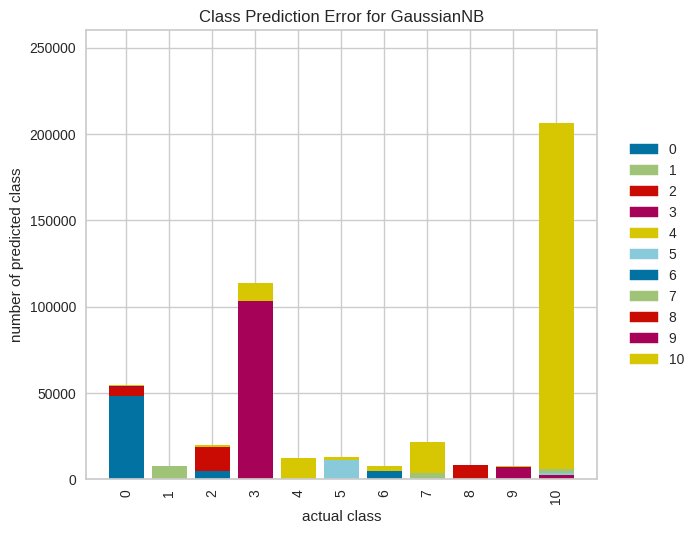

In [13]:
plot_model(nb, plot = 'error')

In [14]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [15]:
nb_val_pred = predict_model(nb, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.2753,0,0,0,0,-0.0194,-0.0219


In [16]:
save_model(nb, 'nb.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categoric

# Decision Tree Classifier

In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9297,0.9499,0.9297,0.9299,0.9298,0.8973,0.8973
1,0.9295,0.9499,0.9295,0.9300,0.9297,0.8970,0.8970
2,0.9295,0.9497,0.9295,0.9297,0.9296,0.8970,0.8970
3,0.9286,0.9492,0.9286,0.9289,0.9288,0.8957,0.8957
4,0.9308,0.9505,0.9308,0.9308,0.9308,0.8989,0.8989
5,0.9298,0.9500,0.9298,0.9301,0.9300,0.8975,0.8975
6,0.9297,0.9502,0.9297,0.9303,0.9300,0.8973,0.8973
7,0.9296,0.9502,0.9296,0.9300,0.9298,0.8972,0.8972
8,0.9297,0.9497,0.9297,0.9298,0.9297,0.8972,0.8972


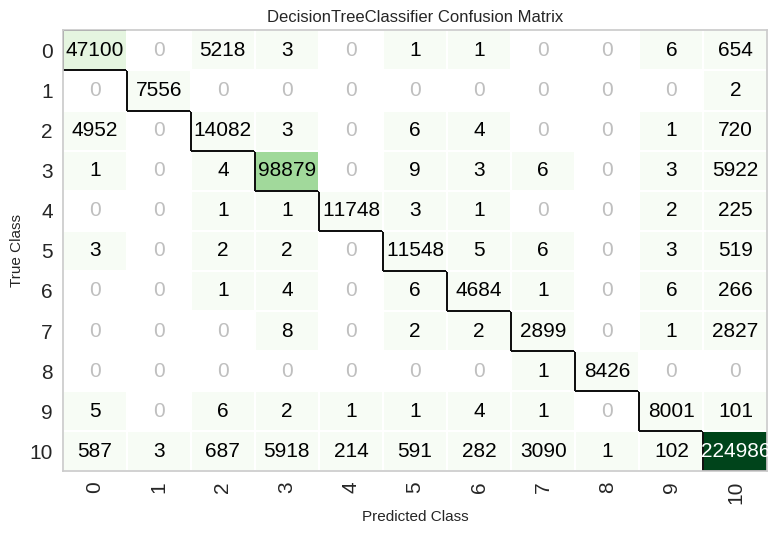

In [18]:
plot_model(dt, plot = 'confusion_matrix')

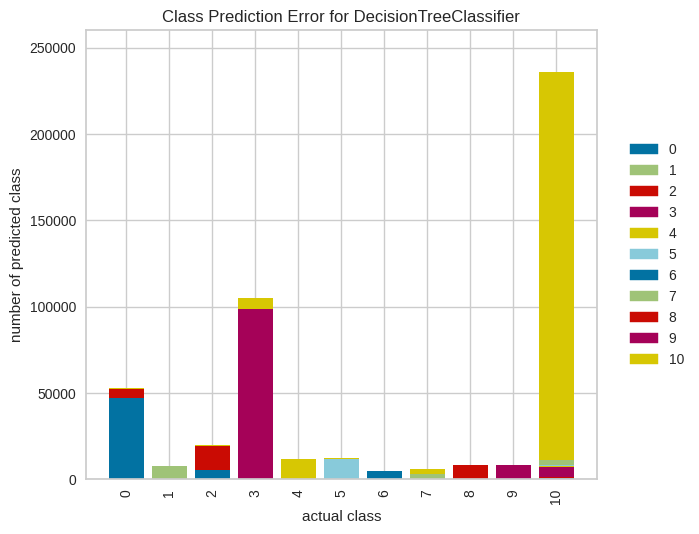

In [19]:
plot_model(dt, plot = 'error')

In [20]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [21]:
dt_val_pred = predict_model(dt, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.4314,0,0,0,0,0.0245,0.0314


In [22]:
save_model(dt, 'dt.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('

# SVM - Linear Kernel

In [23]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9339,0.0000,0.9339,0.9249,0.9285,0.9041,0.9048
1,0.9335,0.0000,0.9335,0.9247,0.9282,0.9035,0.9042
2,0.9336,0.0000,0.9336,0.9246,0.9281,0.9036,0.9043
3,0.9327,0.0000,0.9327,0.9239,0.9273,0.9023,0.9031
4,0.9340,0.0000,0.9340,0.9251,0.9286,0.9042,0.9049
5,0.9336,0.0000,0.9336,0.9246,0.9282,0.9036,0.9043
6,0.9334,0.0000,0.9334,0.9244,0.9279,0.9032,0.9040
7,0.9331,0.0000,0.9331,0.9240,0.9276,0.9028,0.9035
8,0.9341,0.0000,0.9341,0.9249,0.9286,0.9042,0.9049


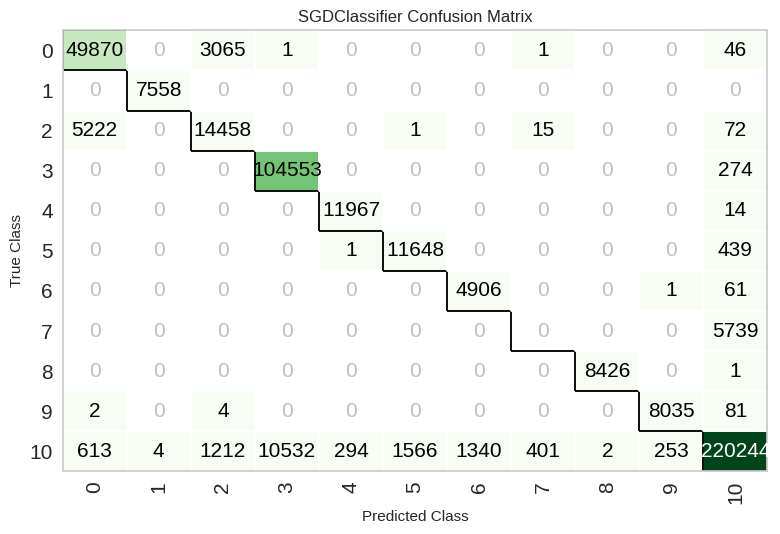

In [24]:
plot_model(svm, plot = 'confusion_matrix')

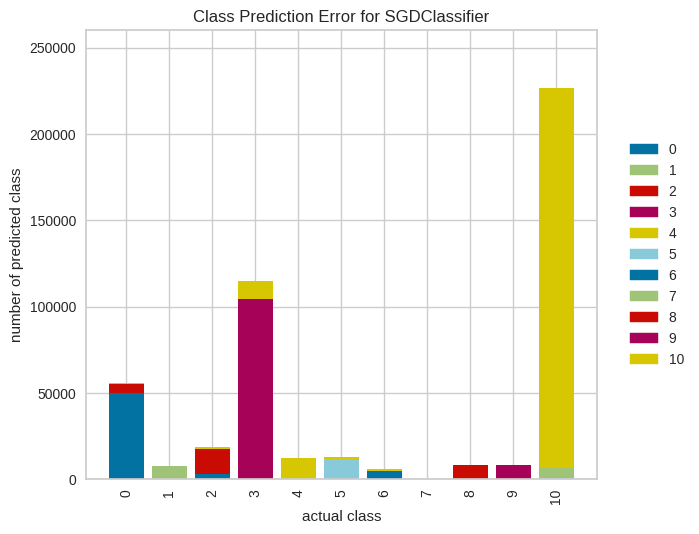

In [25]:
plot_model(svm, plot = 'error')

In [26]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [27]:
svm_val_pred = predict_model(svm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4220,0,0,0,0,-0.0832,-0.1298


In [28]:
save_model(svm, 'svm.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optima

# Ridge Classifier

In [29]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9093,0.0000,0.9093,0.9024,0.8961,0.8664,0.8682
1,0.9092,0.0000,0.9092,0.9025,0.8960,0.8662,0.8680
2,0.9095,0.0000,0.9095,0.9029,0.8965,0.8667,0.8684
3,0.9086,0.0000,0.9086,0.9022,0.8952,0.8653,0.8671
4,0.9095,0.0000,0.9095,0.9027,0.8962,0.8667,0.8684
5,0.9092,0.0000,0.9092,0.9022,0.8959,0.8662,0.8679
6,0.9096,0.0000,0.9096,0.9030,0.8963,0.8669,0.8686
7,0.9100,0.0000,0.9100,0.9035,0.8968,0.8673,0.8691
8,0.9096,0.0000,0.9096,0.9030,0.8965,0.8668,0.8685


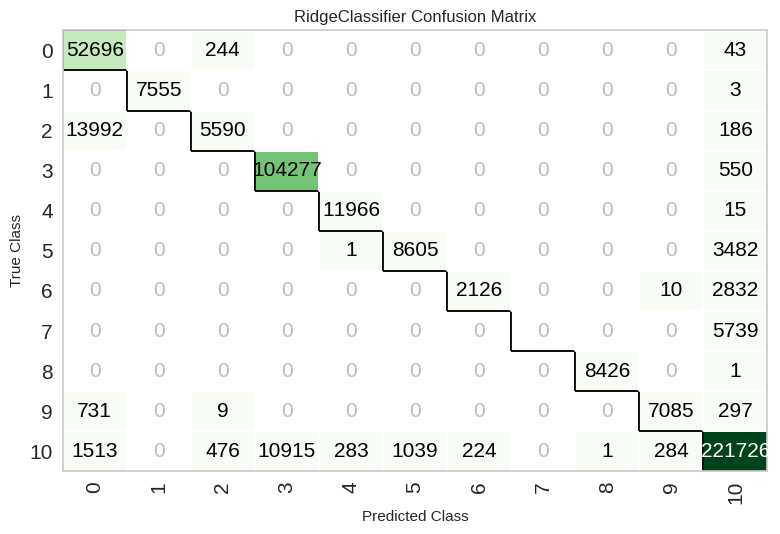

In [30]:
plot_model(ridge, plot = 'confusion_matrix')

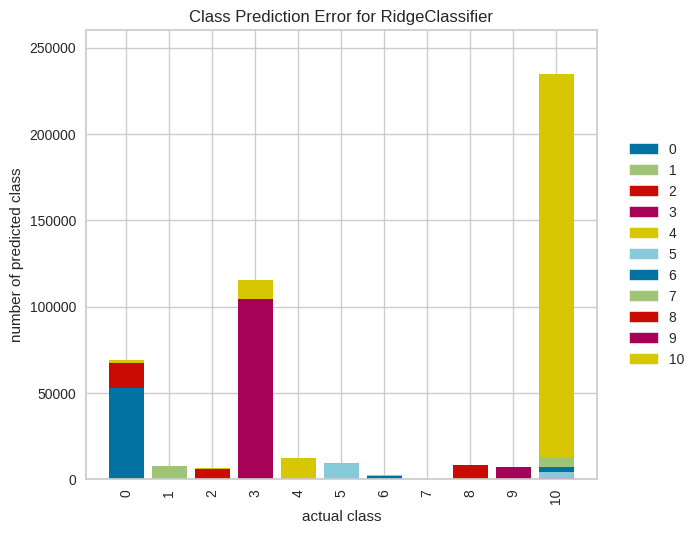

In [31]:
plot_model(ridge, plot = 'error')

In [32]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,6464
solver,auto
tol,0.0001


In [33]:
ridge_val_pred = predict_model(ridge, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4278,0,0,0,0,-0.0951,-0.1613


In [34]:
save_model(ridge, 'ridge.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                          

# Random Forest

In [35]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9591,0.9964,0.9591,0.9590,0.9576,0.9404,0.9407
1,0.9594,0.9964,0.9594,0.9592,0.9579,0.9407,0.9410
2,0.9594,0.9963,0.9594,0.9591,0.9577,0.9408,0.9411
3,0.9585,0.9963,0.9585,0.9582,0.9569,0.9395,0.9397
4,0.9595,0.9965,0.9595,0.9591,0.9578,0.9409,0.9411
5,0.9594,0.9962,0.9594,0.9592,0.9578,0.9407,0.9410
6,0.9588,0.9964,0.9588,0.9585,0.9572,0.9400,0.9403
7,0.9588,0.9963,0.9588,0.9586,0.9572,0.9399,0.9402
8,0.9591,0.9965,0.9591,0.9587,0.9575,0.9404,0.9407


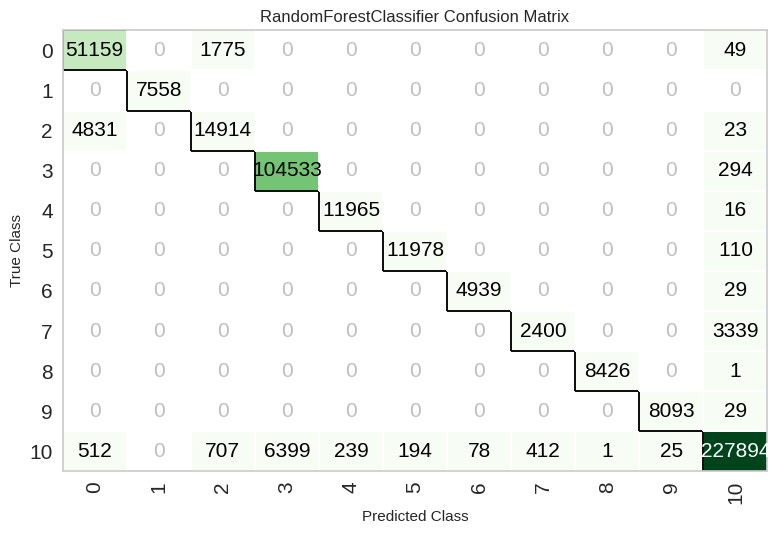

In [36]:
plot_model(rf, plot = 'confusion_matrix')

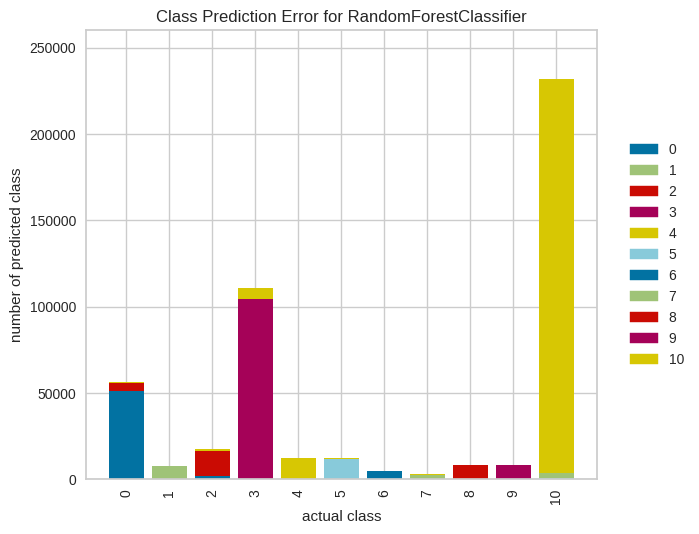

In [37]:
plot_model(rf, plot = 'error')

In [38]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [39]:
rf_val_pred = predict_model(rf, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4560,0,0,0,0,0.0239,0.0343


In [40]:
save_model(rf, 'rf.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_n

# Quadratic Discriminant Analysis

In [41]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8377,0.9309,0.8377,0.8557,0.8423,0.7693,0.7731
1,0.8376,0.9307,0.8376,0.8557,0.8422,0.7691,0.7730
2,0.8367,0.9305,0.8367,0.8558,0.8419,0.7679,0.7719
3,0.8372,0.9307,0.8372,0.8549,0.8417,0.7685,0.7723
4,0.8382,0.9312,0.8382,0.8566,0.8429,0.7699,0.7738
5,0.8378,0.9307,0.8378,0.8561,0.8426,0.7694,0.7733
6,0.8367,0.9307,0.8367,0.8555,0.8416,0.7680,0.7720
7,0.8368,0.9306,0.8368,0.8558,0.8419,0.7681,0.7721
8,0.8388,0.9311,0.8388,0.8565,0.8432,0.7707,0.7745


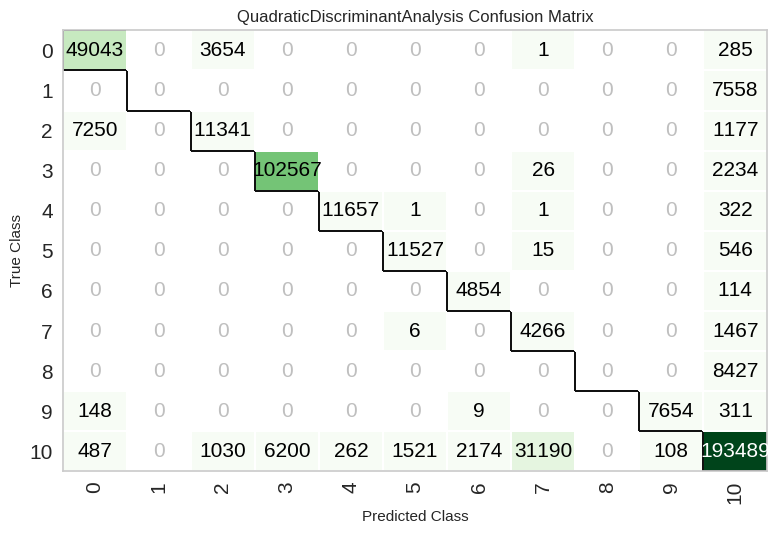

In [43]:
plot_model(qda, plot = 'confusion_matrix')

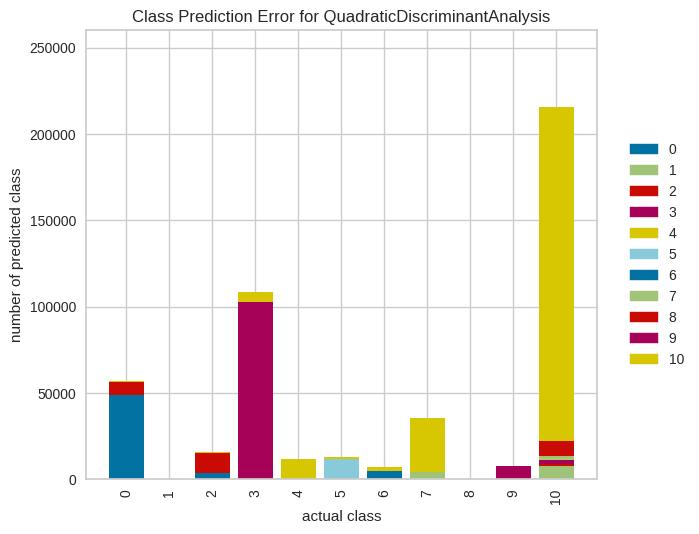

In [44]:
plot_model(qda, plot = 'error')

In [45]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [46]:
qda_val_pred = predict_model(qda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.3634,0,0,0,0,0.0607,0.0704


In [47]:
save_model(qda, 'qda.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                 

# Linear Discriminant Analysis

In [49]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9207,0.9839,0.9207,0.9272,0.9220,0.8865,0.8880
1,0.9210,0.9839,0.9210,0.9278,0.9225,0.8870,0.8886
2,0.9210,0.9837,0.9210,0.9275,0.9224,0.8870,0.8886
3,0.9200,0.9836,0.9200,0.9267,0.9214,0.8855,0.8871
4,0.9214,0.9841,0.9214,0.9278,0.9227,0.8875,0.8890
5,0.9204,0.9837,0.9204,0.9276,0.9221,0.8862,0.8878
6,0.9212,0.9838,0.9212,0.9277,0.9225,0.8872,0.8888
7,0.9206,0.9838,0.9206,0.9270,0.9219,0.8864,0.8879
8,0.9211,0.9840,0.9211,0.9277,0.9225,0.8871,0.8886


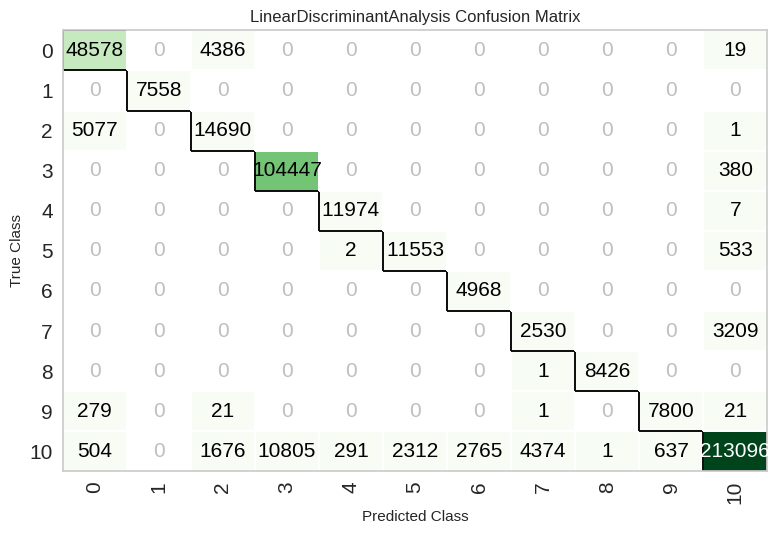

In [50]:
plot_model(lda, plot = 'confusion_matrix')

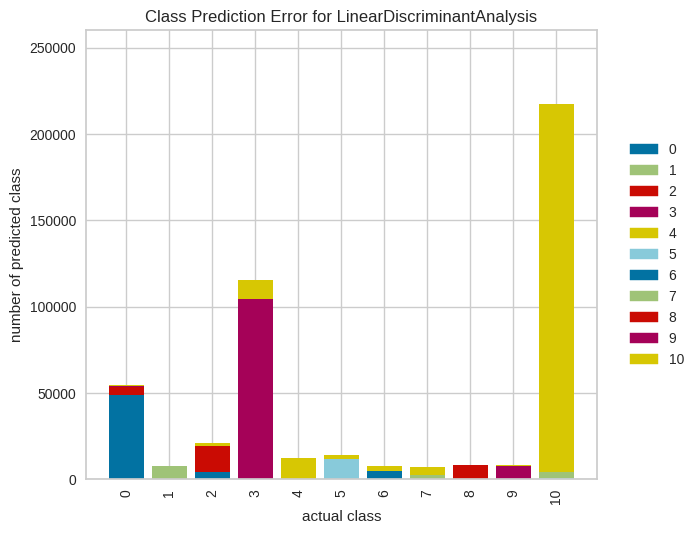

In [51]:
plot_model(lda, plot = 'error')

In [52]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [53]:
lda_val_pred = predict_model(lda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.3322,0,0,0,0,-0.0494,-0.0552


In [54]:
save_model(lda, 'lda.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                          

# Extra Trees

In [55]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9540,0.9958,0.9540,0.9534,0.9514,0.9330,0.9333
1,0.9539,0.9957,0.9539,0.9533,0.9512,0.9327,0.9330
2,0.9537,0.9957,0.9537,0.9528,0.9509,0.9325,0.9329
3,0.9530,0.9957,0.9530,0.9523,0.9503,0.9315,0.9319
4,0.9544,0.9959,0.9544,0.9537,0.9517,0.9335,0.9338
5,0.9543,0.9956,0.9543,0.9538,0.9516,0.9333,0.9337
6,0.9533,0.9958,0.9533,0.9525,0.9506,0.9318,0.9322
7,0.9533,0.9957,0.9533,0.9527,0.9504,0.9318,0.9322
8,0.9540,0.9959,0.9540,0.9530,0.9511,0.9328,0.9332


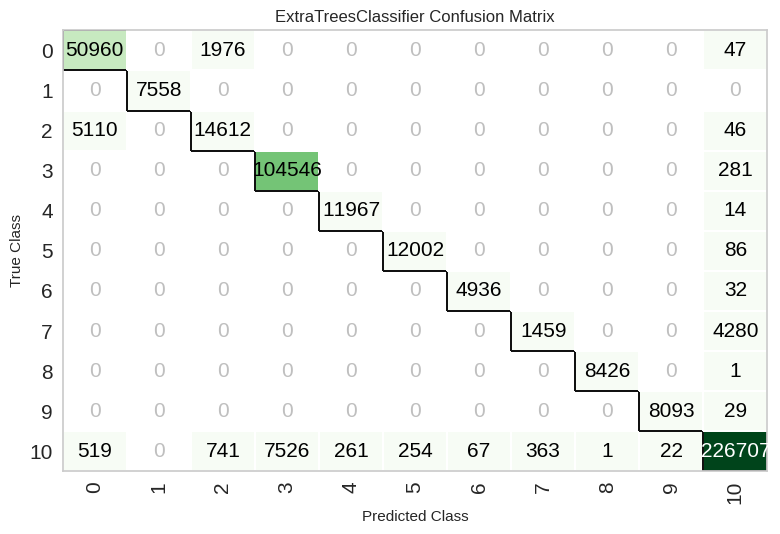

In [56]:
plot_model(et, plot = 'confusion_matrix')

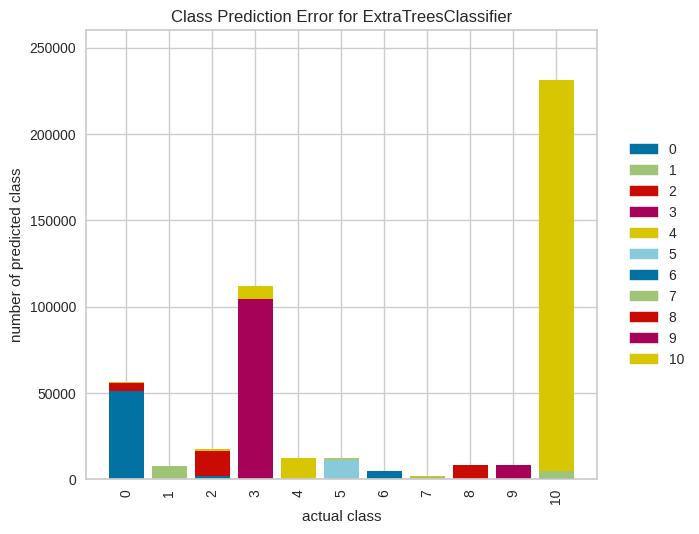

In [57]:
plot_model(et, plot = 'error')

In [58]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [59]:
et_val_pred = predict_model(et, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4562,0,0,0,0,-0.0110,-0.0176


In [60]:
save_model(et, 'et.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=No

# Light Gradient Boosting Machine

In [61]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9295,0.9658,0.9295,0.9236,0.9254,0.8978,0.8982
1,0.9499,0.9793,0.9499,0.9503,0.9498,0.9272,0.9274
2,0.9337,0.9612,0.9337,0.9348,0.9336,0.9037,0.9039
3,0.9386,0.9653,0.9386,0.9384,0.9381,0.9105,0.9107
4,0.9520,0.9792,0.9520,0.9519,0.9516,0.9302,0.9304
5,0.9532,0.9817,0.9532,0.9533,0.9528,0.9319,0.9320
6,0.9414,0.9719,0.9414,0.9428,0.9413,0.9151,0.9154
7,0.9225,0.9482,0.9225,0.9262,0.9233,0.8878,0.8881
8,0.9366,0.9616,0.9366,0.9372,0.9367,0.9076,0.9077


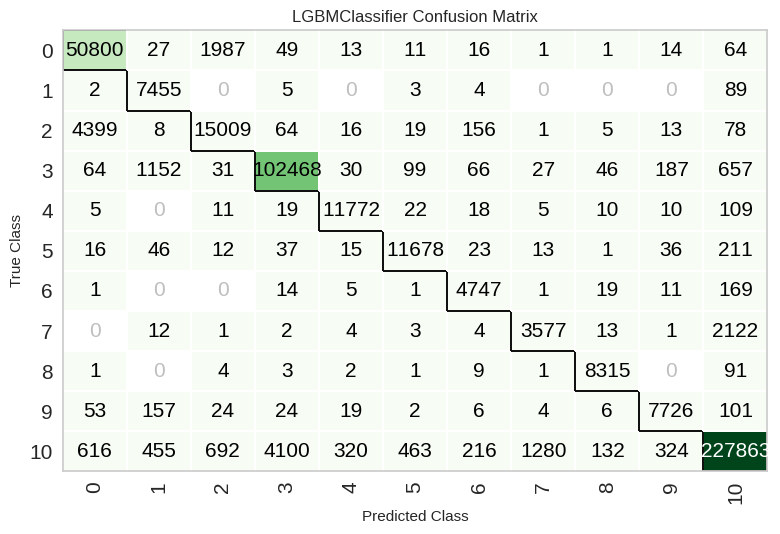

In [62]:
plot_model(lightgbm, plot = 'confusion_matrix')

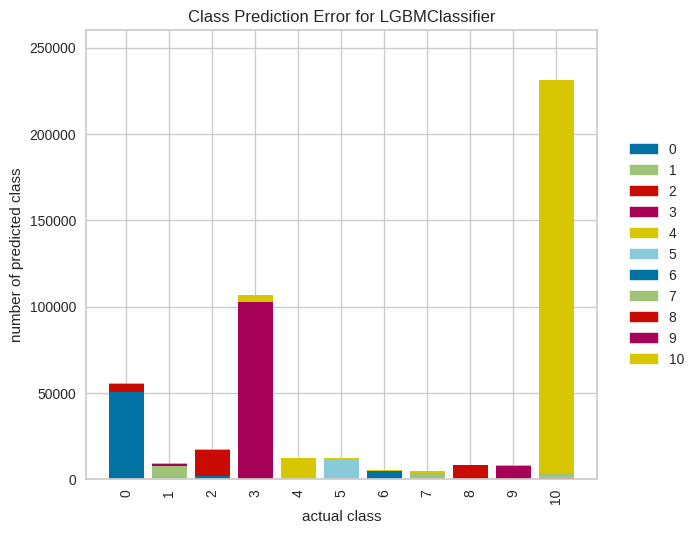

In [63]:
plot_model(lightgbm, plot = 'error')

In [64]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [65]:
lgbm_val_pred = predict_model(lightgbm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4427,0,0,0,0,0.0459,0.0591


In [66]:
save_model(lightgbm, 'lightgbm.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_

# MLP Classifier

In [67]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9684,0.9978,0.9684,0.9679,0.9677,0.9539,0.9539
1,0.9673,0.9975,0.9673,0.9668,0.9665,0.9521,0.9522
2,0.9669,0.9975,0.9669,0.9668,0.9661,0.9516,0.9518
3,0.9674,0.9975,0.9674,0.9671,0.9669,0.9524,0.9525
4,0.9681,0.9977,0.9681,0.9675,0.9671,0.9533,0.9534
5,0.9680,0.9976,0.9680,0.9676,0.9675,0.9532,0.9533
6,0.9676,0.9977,0.9676,0.9674,0.9668,0.9526,0.9527
7,0.9665,0.9975,0.9665,0.9664,0.9663,0.9510,0.9511
8,0.9684,0.9978,0.9684,0.9680,0.9676,0.9538,0.9539


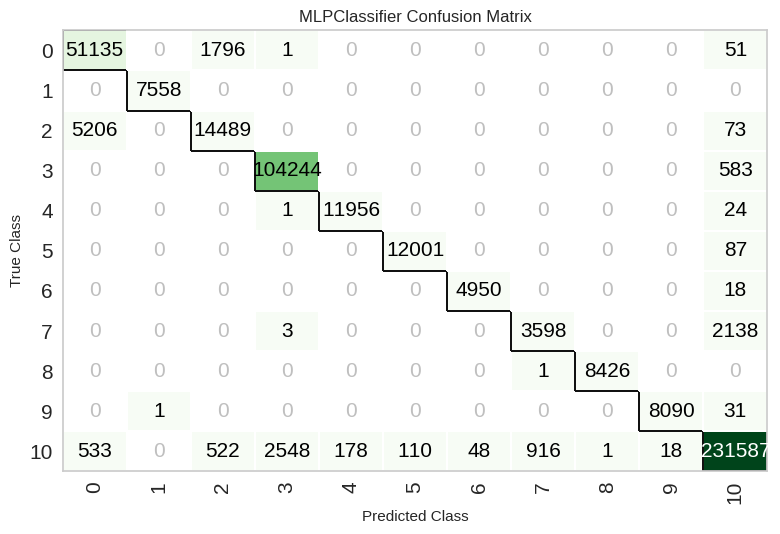

In [68]:
plot_model(mlp, plot = 'confusion_matrix')

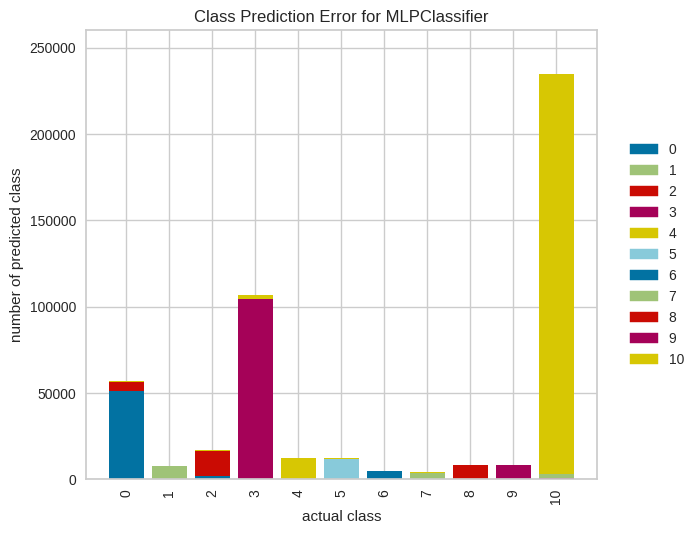

In [69]:
plot_model(mlp, plot = 'error')

In [70]:
plot_model(mlp, plot = 'parameter')

,Parameters
activation,relu
alpha,0.0001
batch_size,auto
beta_1,0.9
beta_2,0.999
early_stopping,False
epsilon,1e-08
hidden_layer_sizes,"(100,)"
learning_rate,constant
learning_rate_init,0.001


In [71]:
save_model(mlp, 'mlp.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
                

In [72]:
mlp_val_pred = predict_model(mlp, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.4685,0,0,0,0,0.0311,0.0483


In [73]:
save_model(mlp, 'mlp.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
                

wandb: Network error (ReadTimeout), entering retry loop.
